In [21]:
%matplotlib inline
import time
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve ,classification_report,confusion_matrix #suc
from sklearn.model_selection import KFold,cross_val_score,train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from urllib.request import urlopen

plt.style.use('ggplot')
#for see no of columns can visible
pd.set_option('display.max_columns',100)

In [22]:
df_breast_cancer = pd.read_csv('data (breast cancer).csv')

In [23]:
#setting 'id_number' sd out index
df_breast_cancer.set_index(['id'],inplace = True)

In [24]:
#convert categorical data to binary
df_breast_cancer['diagnosis']= df_breast_cancer['diagnosis'].map({'M':1,'B':0})

In [25]:
df_breast_cancer.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
92751,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


# Missing values check and drop

In [26]:
df_breast_cancer.isnull()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
842302,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
842517,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
84300903,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
84348301,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
84358402,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
926682,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
926954,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [47]:
df_breast_cancer.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [42]:
names = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

In [44]:
names_index = names
#print(name_index)

In [45]:
del df_breast_cancer['Unnamed: 32']

KeyError: 'Unnamed: 32'

In [46]:
df_breast_cancer.tail(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
92751,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [30]:
print("Dimentions of our data frame: \n",df_breast_cancer.shape)
print("Data Types of our column wise: \n",df_breast_cancer.dtypes)

Dimentions of our data frame: 
 (569, 31)
Data Types of our column wise: 
 diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_wor

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

# Split data intro train test

In [48]:
feature_space = df_breast_cancer.iloc[:,df_breast_cancer.columns !='diagnose']
feature_class = df_breast_cancer.iloc[:,df_breast_cancer.columns =='diagnose']

In [49]:
class_set ,test_set,class_set,test_class_set = train_test_split(feature_space,feature_class,test_size=0.20,random_state=40)

In [50]:
class_set = class_set.values.ravel()
test_class_set = test_class_set.values.ravel()

In [51]:
print(test_class_set)

[]


#Random Forest Classifier 

In [52]:
fit_rf = RandomForestClassifier(random_state=40)

In [53]:
#hyperparameter optimisation using gridsearch cv

In [57]:
np.random.seed(40)#40 is initial index start point
start=time.time()

param_dist = ('max_depth':[2,3,4,5],
             'bootstrap':[True,False],
             'max_features':['auto','sqrt','log2',None],
             'criterion':['gini','entropy'])
cv_rf = GridSearchCV(fit_rf,cv=10,param_grid=param_dist,n_jobs=3)
cv_rf.fit(training_set,class_set)
print("Best parameter using Grid Search CV: \n":cv_rf,best_params_)
end = time.time()
print('Time taken in grid Seatch : %0.2f'%(end-start))

SyntaxError: invalid syntax (30273582.py, line 4)

In [ ]:
fit_rf.set_params(criterion='entropy',max_features='log2',max_depth=5)

# Train random forest

In [ ]:
fit_rf.fit(training_set,class_set)

In [ ]:
#prediction

In [ ]:
predictions_rf = fit_rf.predict(test_set)
print(predictions_rf)

In [ ]:
print(test_class_set)

# Accuracy

In [ ]:
accuracy_rf = fit_rf.score(test_set,test_class_set)
print('here our Accuracy of model is %0.5f'%accuracy_rf)

# Bayes Theorem

In [6]:
#import packages
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;  sns.set()

In [7]:
#import data
training = pd.read_csv('har_train.csv')
test = pd.read_csv('har_validate.csv')

In [8]:
training.shape

(13737, 53)

In [9]:
test.shape

(5885, 53)

In [10]:
training.describe()

,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,accel_belt_z,...,total_accel_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z
count,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,...,13737.000000,13737.000000,13737.00000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000
mean,64.503131,0.191794,-10.941653,11.317973,-0.004831,0.040013,-0.130328,-5.424620,30.152362,-72.748271,...,34.717551,0.159878,0.06067,0.142131,-61.736915,163.438087,-55.328383,-311.819611,379.741210,391.859212
std,62.768030,22.363296,95.374331,7.744534,0.206729,0.078435,0.241559,29.697752,28.560242,100.410466,...,10.089365,0.629520,2.15904,0.601628,180.263200,200.714691,138.501162,346.766862,511.403542,370.396450
min,-28.900000,-54.900000,-180.000000,0.000000,-1.040000,-0.640000,-1.350000,-120.000000,-69.000000,-269.000000,...,0.000000,-3.360000,-7.02000,-8.090000,-498.000000,-585.000000,-410.000000,-1280.000000,-892.000000,-973.000000
25%,1.100000,1.670000,-88.300000,3.000000,-0.030000,0.000000,-0.200000,-21.000000,3.000000,-162.000000,...,29.000000,-0.220000,-1.46000,-0.180000,-178.000000,54.000000,-182.000000,-613.000000,-3.000000,187.000000
50%,114.000000,5.260000,-12.700000,17.000000,0.030000,0.020000,-0.100000,-15.000000,35.000000,-152.000000,...,36.000000,0.050000,0.03000,0.080000,-57.000000,200.000000,-39.000000,-378.000000,595.000000,509.000000
75%,123.000000,14.800000,13.600000,18.000000,0.110000,0.110000,-0.020000,-5.000000,61.000000,27.000000,...,41.000000,0.560000,1.64000,0.490000,76.000000,312.000000,26.000000,-72.000000,737.000000,652.000000
max,162.000000,60.300000,179.000000,28.000000,2.220000,0.640000,1.620000,83.000000,164.000000,105.000000,...,73.000000,3.520000,6.13000,4.310000,477.000000,589.000000,291.000000,666.000000,1480.000000,1090.000000


In [11]:
test.describe()

,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,accel_belt_z,...,total_accel_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z
count,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,...,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000
mean,64.183263,0.570192,-11.819918,11.300085,-0.007370,0.038595,-0.131028,-5.991674,30.160748,-72.232625,...,34.710110,0.153455,0.109031,0.172520,-61.453186,164.164316,-55.206797,-314.341206,380.992333,397.709245
std,62.713506,22.322734,94.776716,7.737757,0.208729,0.077766,0.240786,29.519482,28.621288,100.538973,...,9.978388,0.691182,4.601868,3.069053,181.377979,198.774834,138.165097,347.428437,504.646070,366.621586
min,-28.600000,-55.800000,-179.000000,1.000000,-0.980000,-0.450000,-1.460000,-81.000000,-38.000000,-275.000000,...,0.000000,-22.000000,-6.620000,-6.990000,-496.000000,-632.000000,-446.000000,-1280.000000,-896.000000,-960.000000
25%,1.080000,1.930000,-88.300000,3.000000,-0.030000,0.000000,-0.200000,-21.000000,3.000000,-162.000000,...,29.000000,-0.220000,-1.490000,-0.180000,-178.000000,63.000000,-181.000000,-623.000000,17.000000,197.000000
50%,113.000000,5.360000,-14.300000,17.000000,0.030000,0.020000,-0.100000,-15.000000,35.000000,-152.000000,...,36.000000,0.050000,0.030000,0.070000,-57.000000,202.000000,-43.000000,-380.000000,579.000000,517.000000
75%,123.000000,15.300000,7.390000,18.000000,0.110000,0.110000,-0.020000,-5.000000,61.000000,28.000000,...,41.000000,0.560000,1.610000,0.480000,78.000000,312.000000,26.000000,-78.000000,736.000000,656.000000
max,162.000000,60.100000,179.000000,29.000000,2.020000,0.630000,1.440000,85.000000,149.000000,104.000000,...,108.000000,3.970000,311.000000,231.000000,365.000000,923.000000,254.000000,672.000000,1450.000000,1050.000000


In [12]:
training['classe'].unique()

array(['A', 'B', 'C', 'D', 'E'], dtype=object)

In [13]:
#create x and y
xtrain = training.drop('classe',axis=1)
ytrain = training.loc[:,'classe']

xtest = test.drop('classe',axis =1)
ytest= test.loc[:,'classe']

In [14]:
#init the gaussian classifier
model = GaussianNB()

#training the model
model.fit(xtrain,ytrain)

GaussianNB()

In [15]:
#predict output
pred = model.predict(xtest)
print(pred[:150])

['A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C'
 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'D' 'D' 'E' 'E' 'E' 'E'
 'D' 'C' 'C' 'C' 'D' 'C' 'D' 'D' 'D' 'D' 'D' 'E' 'E' 'E' 'E' 'E' 'E' 'D'
 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'C' 'C' 'C' 'C' 'D' 'D' 'D' 'D' 'D' 'D'
 'D' 'D' 'D' 'D' 'D' 'D']


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

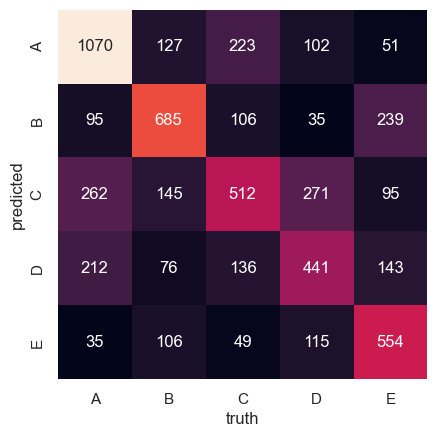

In [16]:
#plot confusin metrics
#plt.figure(figsize=(10,8))
mat = confusion_matrix(pred,ytest)
names = np.unique(pred)
sns.heatmap(mat, square=True ,annot = True,fmt ='d',cbar = False,xticklabels=names,yticklabels=names)
plt.xlabel('truth')
plt.ylabel('predicted')
plt.plot

In [17]:
from sklearn import metrics
#predicted values
y_ped=pred
#actual values
y_act =ytest
#printing confusion matrix
#the columns will show the instances predicted for each
#and the row will show the actual number of instances for
print(metrics.confusion_matrix(pred,ytest,labels=['A','B','C','D','E']))
#printing the precision and recall among other metrics
print(metrics.classification_report(pred,ytest,labels=["A","B","C","D","E"]))

[[1070  127  223  102   51]
 [  95  685  106   35  239]
 [ 262  145  512  271   95]
 [ 212   76  136  441  143]
 [  35  106   49  115  554]]
              precision    recall  f1-score   support

           A       0.64      0.68      0.66      1573
           B       0.60      0.59      0.60      1160
           C       0.50      0.40      0.44      1285
           D       0.46      0.44      0.45      1008
           E       0.51      0.64      0.57       859

    accuracy                           0.55      5885
   macro avg       0.54      0.55      0.54      5885
weighted avg       0.55      0.55      0.55      5885

